In [1]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

# parameters initialization.
num_classes = 1 # total classes : number of output results wanted
num_features = 0 # data features : number of input variables on the dataset. a value of 0 loads from the dataset bellow

# Training parameters.
learning_rate = 0.0000001
training_steps = 5000
batch_size = 100

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.


In [2]:
# predictions Data.
df_predict_ds=pd.read_csv('./week3_exam_dataset_test.csv')

data_predict_x = np.float32(df_predict_ds.values)

# Training Data.
df_tr=pd.read_csv('./week3_exam_dataset_train.csv')

#y Values dataset
df_tr_raw_y= df_tr['y']
df_tr_raw_values_y = df_tr_raw_y.values
y = np.float32(df_tr_raw_values_y)
#X values dataset
df_tr_raw_x= df_tr.drop('y',1)
df_tr_raw_values_x = df_tr_raw_x.values
X = np.float32(df_tr_raw_values_x)
if num_features==0:
    num_features= df_tr_raw_x.shape[1]
    

In [3]:
# define model
model = Sequential()
model.add(Dense(n_hidden_1, activation='relu', kernel_initializer='he_normal', input_shape=(num_features,)))
model.add(Dense(n_hidden_2, activation='relu', kernel_initializer='he_normal', input_shape=(num_features,)))

# example of using dropout
model.add(Dropout(0.5))

# example of using batch normalization
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=learning_rate, momentum=0.8)
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)

# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1920      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 36,225
Trainable params: 35,713
Non-trainable params: 512
_________________________________________________________________


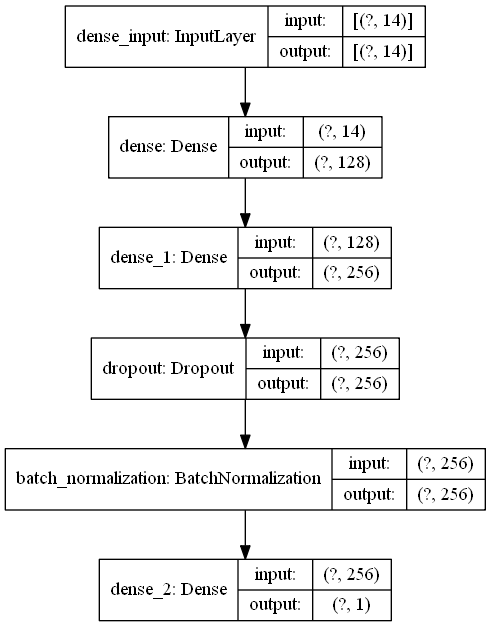

In [4]:
# example of plotting a model
plot_model(model, 'model.png', show_shapes=True)

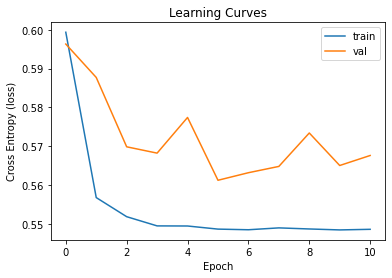

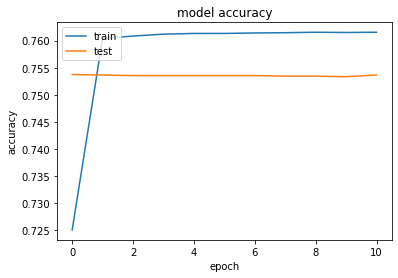

In [5]:
# fit the model
history = model.fit(X, y, epochs=training_steps, batch_size=batch_size, verbose=0, validation_split=0.3, callbacks=[es])

# summarize history for loss
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy (loss)')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()


# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [6]:
# make a prediction
output_pre = model.predict(data_predict_x)

output_pre=np.round(output_pre,0)

def calStats(output, answer):
    num_matches= np.sum(output[:min(len(output), len(answer))] == answer[:min(len(output), len(answer))])
    percentage =round((num_matches / min(len(output), answer.shape[1]))*100,2)
    return num_matches, percentage

output=output_pre

print("distribution of values:")
print("      equal to 1: " + str( round(np.sum(output==1)/output.shape[0]*100,1) )+"%")
print("      equal to 0: " + str( round(np.sum(output==0)/output.shape[0]*100,1) )+"%")

#checking answers
answer1=np.array([[0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1]])
answer2=np.array([[1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1]])
answer3=np.array([[1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0]])
answer4=np.array([[2,1,0,2,0,1,0,2,1,2,1,2,1,1,2,1,1,1,1,2,0,1,3,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,1,1,1,1,1,2,1,0,1,1,1,0,1,1,2,1,3,1,1,1,0,0,1,1,2,1,1,1,1,1,1,1,2,1,2,0,1,1,2,1,0,0,2,1,1,1,2,0,1,1,1,1,1,2,1,1,0,1,1,0,3,1,0]])

print("")
print("checking answers:")

if (output==answer1).all():
    print("answwer starts with '0 0 1'")
elif (output==answer2).all():
    print("answwer starts with '1 0 1'")
elif (output==answer3).all():
    print("answwer starts with '1 1 0'")
elif (output==answer4).all():
    print("answwer starts with '2 1 0'")
else:
    print("none of the answers matches the output. Answer starts with: ")
    num_matches, percentage= calStats(output, answer1)
    print ("       '0 0 1 ...' -> matches ["+ str(num_matches)+"]: "+ str(percentage) +"% of values")
    num_matches, percentage= calStats(output, answer2)
    print ("       '1 0 1 ...' -> matches ["+ str(num_matches)+"]: "+ str(percentage) +"% of values")
    num_matches, percentage= calStats(output, answer3)
    print ("       '1 1 0 ...' -> matches ["+ str(num_matches)+"]: "+ str(percentage) +"% of values")
    num_matches, percentage= calStats(output, answer4)
    print ("       '2 1 0 ...' -> matches ["+ str(num_matches)+"]: "+ str(percentage) +"% of values")
                

distribution of values:
      equal to 1: 0.0%
      equal to 0: 100.0%

checking answers:
none of the answers matches the output. Answer starts with: 
       '0 0 1 ...' -> matches [80]: 79.21% of values
       '1 0 1 ...' -> matches [55]: 54.46% of values
       '1 1 0 ...' -> matches [21]: 20.79% of values
       '2 1 0 ...' -> matches [15]: 14.85% of values
